<a href="https://colab.research.google.com/github/Th33na/project-fakers/blob/main/project_fakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import re
from urllib import request
import shutil
import gzip
import pandas as pd
import re
#import language_tool_python
#from google.colab import file
# import language_check
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# New Section

In [2]:
"""from IPython.display import clear_output
try:
  !pip install hvplot
  !pip install holoviews
  !pip install language-check
  !pip install --upgrade language_tool_python
except:
  print("Error installing.")
finally:
  clear_output()
  print("Installed.")"""

'from IPython.display import clear_output\ntry:\n  !pip install hvplot\n  !pip install holoviews\n  !pip install language-check\n  !pip install --upgrade language_tool_python\nexcept:\n  print("Error installing.")\nfinally:\n  clear_output()\n  print("Installed.")'

In [3]:
#TOOL = language_tool_python.LanguageTool('en-US')

In [4]:
def get_mentions(review, wordsToSearchFor):
  for word in wordsToSearchFor:
    if re.search(word, review): return 1
  return 0

In [5]:
def get_grammar_mistake_count(review, word_count = 0, threshold = 7):
  # of mistakes
  # using language-check
  if word_count >= threshold:
    matches = TOOL.check(review)
    return len(matches)
  return None

In [6]:
review = "A sentence with a error in "
word_count = 6
get_grammar_mistake_count(review, word_count)

In [7]:
review = "The the quick brow nfox"
get_grammar_mistake_count(review)

In [8]:
review = "The quick brow nfox"
get_grammar_mistake_count(review)

In [9]:
def get_word_count(review):
  # give the number of words in the review
  output = re.split("\s|(?<!\d)[.?!](?!\d)", review)
  if '' in output: output.remove('')
  return len(output)

In [10]:
def download_data_to_csv(url):
    # download process
    print("downloading: ",url)
    file_title = re.split(pattern='/', string=url)[-1]
    urlrtv = request.urlretrieve(url=url, filename=file_title)
    
    # for ".tsv" to ".csv"
    title = re.split(pattern=r'\.tsv', string=file_title)[0] +".csv"
    
    # unzip ".gz" file
    with gzip.open(file_title, 'rb') as f_in:
        with open(title, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [11]:
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz"

download_data_to_csv(url)

downloading:  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz


In [12]:
# read ".csv" file for Amazon Reviews
amazon_home_entertainment_reviews_df = pd.read_csv("amazon_reviews_us_Home_Entertainment_v1_00.csv",sep="\\t",engine = "python",na_values=["\\N"])


# display
amazon_home_entertainment_reviews_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,179886,RY01SAV7HZ8QO,B00NTI0CQ2,667358431,Aketek 1080P LED Protable Projector HD PC AV V...,Home Entertainment,4,0,0,N,Y,good enough for my purpose,not the best picture quality but surely suitab...,2015-08-31
1,US,37293769,R1XX8SDGJ4MZ4L,B00BUCLVZU,621695622,TiVo Mini with IR Remote (Old Version),Home Entertainment,5,0,0,N,N,Tell the Cable Company to Keep their Boxes!,Not only do my TiVo Minis replace the boxes th...,2015-08-31
2,US,8332121,R149Q3B5L33NN5,B00RBX9D5W,143071132,Apple TV MD199LL/A Bundle including remote and...,Home Entertainment,5,0,0,N,Y,Works perfectly!,Works perfectly! Very user friendly!,2015-08-31
3,US,47054962,R2ZVD69Z6KPJ4O,B00UJ3IULO,567816707,New Roku 3 6.5 Foot HDMI - Bundle - v1,Home Entertainment,1,0,2,N,Y,It doesn't work. Each time I try to use ...,"It doesn't work. Each time I try to use it, th...",2015-08-31
4,US,23413911,R1DIKG2G33ZLNP,B0037UCTXG,909557698,Generic DVI-I Dual-Link (M) to 15-Pin VGA (F) ...,Home Entertainment,4,0,0,N,Y,As pictured,I received the item pictured. I am unsure why...,2015-08-31


In [13]:
# display column datatypes
amazon_home_entertainment_reviews_df.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

In [14]:
# retrieve only Roku reviews
roku_reviews_df = amazon_home_entertainment_reviews_df[amazon_home_entertainment_reviews_df["product_title"].str.contains("roku", na=False, flags=re.IGNORECASE)]

# display
roku_reviews_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
3,US,47054962,R2ZVD69Z6KPJ4O,B00UJ3IULO,567816707,New Roku 3 6.5 Foot HDMI - Bundle - v1,Home Entertainment,1,0,2,N,Y,It doesn't work. Each time I try to use ...,"It doesn't work. Each time I try to use it, th...",2015-08-31
13,US,2681147,RUQK5N4WH8UN8,B00FO12XY6,448806082,Roku HD Streaming Player (Certified Refurbished),Home Entertainment,5,0,0,N,Y,Five Stars,"Smooth and worked great, thanks!",2015-08-31
19,US,3004043,R3IIOLWHWC297U,B00MWCJ8VQ,946374680,Roku 3500XB Streaming Stick (HDMI) (Certified ...,Home Entertainment,5,0,0,N,Y,Five Stars,great product,2015-08-31
26,US,11268174,R21ULVCK88UZZZ,B00UJ3IREE,916687035,New Roku 2 6.5 Foot HDMI - Bundle - v1,Home Entertainment,5,0,1,N,Y,Five Stars,Love it,2015-08-31
27,US,46451109,R1OF4M9SVG6I29,B00UJ3IULO,567816707,New Roku 3 6.5 Foot HDMI - Bundle - v1,Home Entertainment,1,1,3,N,Y,I consider myself scammed,There was no indication this product is not me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690528,US,51375658,R3JJRTEPH17DKI,B000127NL6,438258689,"Roku HD1000 ArtPack ""Nature"" for Roku HD1000 H...",Home Entertainment,5,1,1,N,Y,Great Artpact,I own several of the Roku art packs and this i...,2004-06-17
690736,US,35619109,R218E7LGCEP7U7,B0000DH8HH,912775848,Roku HD1000 High-Definition Digital Media Player,Home Entertainment,3,10,20,N,N,Second thoughts,This product is truly designed for owners of d...,2004-06-04
692466,US,53065024,RCNANI055M4ZO,B0000DH8HH,912775848,Roku HD1000 High-Definition Digital Media Player,Home Entertainment,4,19,23,N,N,"Very good product, although a bit too expensive",This is a very well executed product. <br />Af...,2004-02-12
693357,US,32635003,R2UZIGJVY141BS,B0000DH8HH,912775848,Roku HD1000 High-Definition Digital Media Player,Home Entertainment,4,37,40,N,N,Chris L,Have had mine now for a month. Works as advert...,2003-12-29


In [15]:
# write dataframe to .csv
roku_reviews_df.to_csv("roku_reviews.csv")

In [16]:
roku_reviews_df = pd.read_csv("roku_reviews.csv",
                             index_col="review_date",
                             infer_datetime_format=True,
                             parse_dates=True)

# display
roku_reviews_df.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
review_date,,,,,,,,,,,,,,,
2015-08-31,3,US,47054962,R2ZVD69Z6KPJ4O,B00UJ3IULO,567816707,New Roku 3 6.5 Foot HDMI - Bundle - v1,Home Entertainment,1,0,2,N,Y,It doesn't work. Each time I try to use ...,"It doesn't work. Each time I try to use it, th..."
2015-08-31,13,US,2681147,RUQK5N4WH8UN8,B00FO12XY6,448806082,Roku HD Streaming Player (Certified Refurbished),Home Entertainment,5,0,0,N,Y,Five Stars,"Smooth and worked great, thanks!"
2015-08-31,19,US,3004043,R3IIOLWHWC297U,B00MWCJ8VQ,946374680,Roku 3500XB Streaming Stick (HDMI) (Certified ...,Home Entertainment,5,0,0,N,Y,Five Stars,great product
2015-08-31,26,US,11268174,R21ULVCK88UZZZ,B00UJ3IREE,916687035,New Roku 2 6.5 Foot HDMI - Bundle - v1,Home Entertainment,5,0,1,N,Y,Five Stars,Love it
2015-08-31,27,US,46451109,R1OF4M9SVG6I29,B00UJ3IULO,567816707,New Roku 3 6.5 Foot HDMI - Bundle - v1,Home Entertainment,1,1,3,N,Y,I consider myself scammed,There was no indication this product is not me...


In [17]:
# display column types
roku_reviews_df.dtypes

Unnamed: 0            int64
marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
dtype: object

In [18]:
# drop columns
roku_reviews_df.drop(roku_reviews_df.columns[[0, 1, 2, 3, 5, 7]], axis=1, inplace=True)

#display
roku_reviews_df.head()

,product_id,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
review_date,,,,,,,,,
2015-08-31,B00UJ3IULO,New Roku 3 6.5 Foot HDMI - Bundle - v1,1,0,2,N,Y,It doesn't work. Each time I try to use ...,"It doesn't work. Each time I try to use it, th..."
2015-08-31,B00FO12XY6,Roku HD Streaming Player (Certified Refurbished),5,0,0,N,Y,Five Stars,"Smooth and worked great, thanks!"
2015-08-31,B00MWCJ8VQ,Roku 3500XB Streaming Stick (HDMI) (Certified ...,5,0,0,N,Y,Five Stars,great product
2015-08-31,B00UJ3IREE,New Roku 2 6.5 Foot HDMI - Bundle - v1,5,0,1,N,Y,Five Stars,Love it
2015-08-31,B00UJ3IULO,New Roku 3 6.5 Foot HDMI - Bundle - v1,1,1,3,N,Y,I consider myself scammed,There was no indication this product is not me...


In [60]:
# find the count of all unique product_id values in the index
roku_reviews_df["product_id"].value_counts()
counts=roku_reviews_df["product_id"].value_counts()

In [61]:
roku_pie_df=roku_reviews_df['product_id'].value_counts()
ten_product_id=roku_pie_df.head(10).index

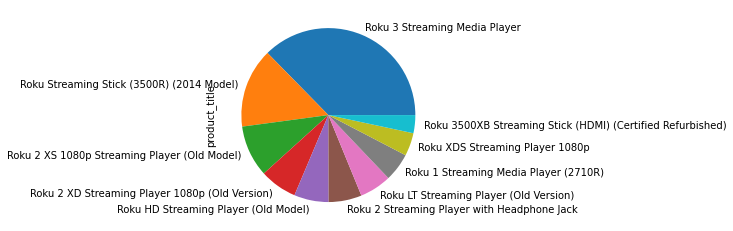

In [62]:
clean_roku=roku_reviews_df[roku_reviews_df['product_id'].isin(ten_product_id)]
clean_roku['product_title'].value_counts().plot(kind='pie')

In [63]:
clean_roku.head()

,product_id,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
review_date,,,,,,,,,
2015-08-31,B00MWCJ8VQ,Roku 3500XB Streaming Stick (HDMI) (Certified ...,5,0,0,N,Y,Five Stars,great product
2015-08-31,B00BGGDVOO,Roku 3 Streaming Media Player,5,0,0,N,Y,Five Stars,Great!
2015-08-31,B00INNP5VU,Roku Streaming Stick (3500R) (2014 Model),5,0,0,N,Y,Five Stars,Absolutely EPIC streaming! So thrilled!
2015-08-31,B00F5NB7JK,Roku 1 Streaming Media Player (2710R),5,0,0,N,Y,This has been extremely helpful for me as I en...,This has been extremely helpful for me as I en...
2015-08-31,B00INNP5VU,Roku Streaming Stick (3500R) (2014 Model),4,1,1,N,Y,Recently purchased this device for a second TV...,Recently purchased this device for a second TV...


In [20]:
# retrieve only a specific Roku product's reviews
roku_product_reviews_df = roku_reviews_df[roku_reviews_df["product_id"] == "B00BGGDVOO"]

# display
roku_product_reviews_df

,product_id,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
review_date,,,,,,,,,
2015-08-31,B00BGGDVOO,Roku 3 Streaming Media Player,5,0,0,N,Y,Five Stars,Great!
2015-08-31,B00BGGDVOO,Roku 3 Streaming Media Player,5,0,0,N,Y,Five Stars,Great!
2015-08-31,B00BGGDVOO,Roku 3 Streaming Media Player,5,0,0,N,Y,This thing is perfect. Want to,This thing is perfect.<br />Want to watch netf...
2015-08-31,B00BGGDVOO,Roku 3 Streaming Media Player,5,0,0,N,Y,On the fence? Don't be.,One of the best purchases I have ever made. T...
2015-08-30,B00BGGDVOO,Roku 3 Streaming Media Player,5,0,0,N,Y,Five Stars,This is just an awesome invention. It hardly ...
...,...,...,...,...,...,...,...,...,...
2013-03-07,B00BGGDVOO,Roku 3 Streaming Media Player,5,26,36,N,N,Amazing!!!!,I was able to get the Roku 3 a little early an...
2013-03-07,B00BGGDVOO,Roku 3 Streaming Media Player,5,14,19,N,Y,GREAT GREAT GREAT,Just got my roku 3 today. I haven't ran it to...
2013-03-06,B00BGGDVOO,Roku 3 Streaming Media Player,5,21,113,N,Y,Roku 3 Review,I don't have a Roku 3.don't know whether or no...


In [21]:
roku_onehotencoder_df = roku_product_reviews_df[["verified_purchase"]]

roku_onehotencoder_df.head()

,verified_purchase
review_date,
2015-08-31,Y
2015-08-31,Y
2015-08-31,Y
2015-08-31,Y
2015-08-30,Y


In [22]:
roku_product_reviews_df = roku_product_reviews_df.reset_index()

display(roku_product_reviews_df.tail())

,review_date,product_id,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body
14195,2013-03-07,B00BGGDVOO,Roku 3 Streaming Media Player,5,26,36,N,N,Amazing!!!!,I was able to get the Roku 3 a little early an...
14196,2013-03-07,B00BGGDVOO,Roku 3 Streaming Media Player,5,14,19,N,Y,GREAT GREAT GREAT,Just got my roku 3 today. I haven't ran it to...
14197,2013-03-06,B00BGGDVOO,Roku 3 Streaming Media Player,5,21,113,N,Y,Roku 3 Review,I don't have a Roku 3.don't know whether or no...
14198,2013-03-06,B00BGGDVOO,Roku 3 Streaming Media Player,5,689,792,N,N,AWESOME Product! GREAT new Features!,The Roku 3 is an awesome upgrade from my previ...
14199,2013-03-06,B00BGGDVOO,Roku 3 Streaming Media Player,5,5202,5430,N,N,New models available,"UPDATE: November 20, 2015<br /><br />Wow, thes..."


In [23]:
# write dataframe to .csv file
roku_product_reviews_df.to_csv("roku_B00BGGDVOO_reviews.csv")

In [24]:
# create a list of categorical variables
categorical_variables = list(roku_onehotencoder_df)

# display the categorical variables list
categorical_variables

['verified_purchase']

In [25]:
# create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [26]:
# encode the categorical variables using OneHotEncoder
encoded_data = enc.fit_transform(roku_onehotencoder_df[categorical_variables])

In [27]:
# create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
                    encoded_data,
                    columns=enc.get_feature_names_out(categorical_variables))

# review the DataFrame
display(encoded_df.head())
display(encoded_df.tail())

,verified_purchase_N,verified_purchase_Y
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


,verified_purchase_N,verified_purchase_Y
14195,1.0,0.0
14196,0.0,1.0
14197,0.0,1.0
14198,1.0,0.0
14199,1.0,0.0


In [28]:
roku_product_reviews_df = roku_product_reviews_df.drop(columns=["product_id", "product_title", "vine", "review_headline", "verified_purchase"])
encoded_df = encoded_df.drop(columns=["verified_purchase_N"])

In [29]:
# add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
roku_df = pd.concat(
                [
                    roku_product_reviews_df,
                    encoded_df
                ],
                axis=1)

In [30]:
roku_df = roku_df.set_index("review_date")

# review the dataframe
display(roku_df.head())
display(roku_df.tail())

,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y
review_date,,,,,
2015-08-31,5,0,0,Great!,1.0
2015-08-31,5,0,0,Great!,1.0
2015-08-31,5,0,0,This thing is perfect.<br />Want to watch netf...,1.0
2015-08-31,5,0,0,One of the best purchases I have ever made. T...,1.0
2015-08-30,5,0,0,This is just an awesome invention. It hardly ...,1.0


,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y
review_date,,,,,
2013-03-07,5,26,36,I was able to get the Roku 3 a little early an...,0.0
2013-03-07,5,14,19,Just got my roku 3 today. I haven't ran it to...,1.0
2013-03-06,5,21,113,I don't have a Roku 3.don't know whether or no...,1.0
2013-03-06,5,689,792,The Roku 3 is an awesome upgrade from my previ...,0.0
2013-03-06,5,5202,5430,"UPDATE: November 20, 2015<br /><br />Wow, thes...",0.0


In [31]:
# drop na values
roku_df = roku_df.dropna()

roku_df["review_word_count"] = 0

roku_df["review_word_count"] = roku_df.apply(lambda row: get_word_count(row["review_body"]), axis=1)

# review the dataframe
display(roku_df.head())
display(roku_df.tail())

,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y,review_word_count
review_date,,,,,,
2015-08-31,5,0,0,Great!,1.0,1
2015-08-31,5,0,0,Great!,1.0,1
2015-08-31,5,0,0,This thing is perfect.<br />Want to watch netf...,1.0,48
2015-08-31,5,0,0,One of the best purchases I have ever made. T...,1.0,32
2015-08-30,5,0,0,This is just an awesome invention. It hardly ...,1.0,12


,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y,review_word_count
review_date,,,,,,
2013-03-07,5,26,36,I was able to get the Roku 3 a little early an...,0.0,100
2013-03-07,5,14,19,Just got my roku 3 today. I haven't ran it to...,1.0,269
2013-03-06,5,21,113,I don't have a Roku 3.don't know whether or no...,1.0,100
2013-03-06,5,689,792,The Roku 3 is an awesome upgrade from my previ...,0.0,953
2013-03-06,5,5202,5430,"UPDATE: November 20, 2015<br /><br />Wow, thes...",0.0,1864


In [32]:
wordsToSearchFor = ['chromecast', "apple tv", "fire tv stick"]
roku_df["competitor_mentioned"] = 0

roku_df["competitor_mentioned"] = roku_df.apply(lambda row: get_mentions(row["review_body"].lower(), wordsToSearchFor), axis=1)

# review the dataframe
display(roku_df.head())
display(roku_df.tail())

,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,,
2015-08-31,5,0,0,Great!,1.0,1,0
2015-08-31,5,0,0,Great!,1.0,1,0
2015-08-31,5,0,0,This thing is perfect.<br />Want to watch netf...,1.0,48,0
2015-08-31,5,0,0,One of the best purchases I have ever made. T...,1.0,32,0
2015-08-30,5,0,0,This is just an awesome invention. It hardly ...,1.0,12,0


,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,,
2013-03-07,5,26,36,I was able to get the Roku 3 a little early an...,0.0,100,0
2013-03-07,5,14,19,Just got my roku 3 today. I haven't ran it to...,1.0,269,1
2013-03-06,5,21,113,I don't have a Roku 3.don't know whether or no...,1.0,100,0
2013-03-06,5,689,792,The Roku 3 is an awesome upgrade from my previ...,0.0,953,1
2013-03-06,5,5202,5430,"UPDATE: November 20, 2015<br /><br />Wow, thes...",0.0,1864,0


In [33]:
"""word_threshold = 7
roku_df["grammer_check"] = 0

roku_df["grammer_check"] = roku_df.apply(lambda row: get_grammar_mistake_count(row["review_body"], row["review_word_count"] ), axis=1)
roku_df.head()
"""

'word_threshold = 7\nroku_df["grammer_check"] = 0\n\nroku_df["grammer_check"] = roku_df.apply(lambda row: get_grammar_mistake_count(row["review_body"], row["review_word_count"] ), axis=1)\nroku_df.head()\n'

In [34]:
roku_df["competitor_mentioned"].value_counts()

0    13164
1     1036
Name: competitor_mentioned, dtype: int64

In [35]:
roku_df["star_rating"].value_counts()

5    9873
4    2013
1     962
3     805
2     547
Name: star_rating, dtype: int64

In [36]:
# initialze word count threshold
word_count_threshold = 7

# initialize the new signal column
roku_df["possible_bias"] = 0

# if the review word count is less than or equal to word count theshold then indicate possible bias
roku_df.loc[(roku_df["review_word_count"] <= word_count_threshold), "possible_bias"] = 1

# if the star rating is 1 and a competitor mentioned is true then indicate a possible bias
roku_df.loc[(roku_df["star_rating"].isin([1]) & roku_df["competitor_mentioned"].isin([1])), "possible_bias"] = 1

# review the dataframe
display(roku_df.head())
display(roku_df.tail())

,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y,review_word_count,competitor_mentioned,possible_bias
review_date,,,,,,,,
2015-08-31,5,0,0,Great!,1.0,1,0,1
2015-08-31,5,0,0,Great!,1.0,1,0,1
2015-08-31,5,0,0,This thing is perfect.<br />Want to watch netf...,1.0,48,0,0
2015-08-31,5,0,0,One of the best purchases I have ever made. T...,1.0,32,0,0
2015-08-30,5,0,0,This is just an awesome invention. It hardly ...,1.0,12,0,0


,star_rating,helpful_votes,total_votes,review_body,verified_purchase_Y,review_word_count,competitor_mentioned,possible_bias
review_date,,,,,,,,
2013-03-07,5,26,36,I was able to get the Roku 3 a little early an...,0.0,100,0,0
2013-03-07,5,14,19,Just got my roku 3 today. I haven't ran it to...,1.0,269,1,0
2013-03-06,5,21,113,I don't have a Roku 3.don't know whether or no...,1.0,100,0,0
2013-03-06,5,689,792,The Roku 3 is an awesome upgrade from my previ...,0.0,953,1,0
2013-03-06,5,5202,5430,"UPDATE: November 20, 2015<br /><br />Wow, thes...",0.0,1864,0,0


In [37]:
roku_df["possible_bias"].value_counts()

0    12601
1     1599
Name: possible_bias, dtype: int64

**Split the data into training and testing datasets.**

In [38]:
X = roku_df.drop(columns=["review_body", "possible_bias"])

# review the DataFrame
display(X.head())
display(X.tail())

,star_rating,helpful_votes,total_votes,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,
2015-08-31,5,0,0,1.0,1,0
2015-08-31,5,0,0,1.0,1,0
2015-08-31,5,0,0,1.0,48,0
2015-08-31,5,0,0,1.0,32,0
2015-08-30,5,0,0,1.0,12,0


,star_rating,helpful_votes,total_votes,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,
2013-03-07,5,26,36,0.0,100,0
2013-03-07,5,14,19,1.0,269,1
2013-03-06,5,21,113,1.0,100,0
2013-03-06,5,689,792,0.0,953,1
2013-03-06,5,5202,5430,0.0,1864,0


In [39]:
# create the target set selecting the possible_bias column and assigning it to y
y = roku_df["possible_bias"]

# review the value counts
y.value_counts()

0    12601
1     1599
Name: possible_bias, dtype: int64

In [40]:
# select the start of the training period
training_begin = X.index.min()

# display the training begin date
display(training_begin)

Timestamp('2013-03-06 00:00:00')

In [41]:
# select the ending period for the training data with an offset of 12 months
training_end = X.index.min() + DateOffset(months=12)

# display the training end date
display(training_end)

Timestamp('2014-03-06 00:00:00')

In [42]:
# convert timestamp to dates
training_begin_date = training_begin.strftime("%Y-%m-%d")
training_end_date = training_end.strftime("%Y-%m-%d")

# display training dates
display(training_begin_date)
display(training_end_date)

'2013-03-06'

'2014-03-06'

In [43]:
# generate the X_train and y_train DataFrames
X_train = X.loc[training_begin_date:training_end_date]
y_train = y.loc[training_begin_date:training_end_date]

# review the X_train DataFrame
display(X_train.head())
display(X_train.tail())

,star_rating,helpful_votes,total_votes,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,
2014-03-06,5,0,0,1.0,21,0
2014-03-06,5,0,0,1.0,29,0
2014-03-06,1,6,6,1.0,227,0
2014-03-06,5,0,0,1.0,46,0
2014-03-06,5,0,0,1.0,94,0


,star_rating,helpful_votes,total_votes,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,
2013-03-07,5,26,36,0.0,100,0
2013-03-07,5,14,19,1.0,269,1
2013-03-06,5,21,113,1.0,100,0
2013-03-06,5,689,792,0.0,953,1
2013-03-06,5,5202,5430,0.0,1864,0


In [44]:
# convert timestamp to dates
testing_begin = training_end+DateOffset(days=1)
testing_begin_date = testing_begin.strftime("%Y-%m-%d")

# display testing dates
display(testing_begin_date)

'2014-03-07'

In [45]:
# generate the X_test and y_test DataFrames
X_test = X.loc[testing_begin_date:]
y_test = y.loc[testing_begin_date:]

# review the X_test DataFrame
display(X_test.head())
display(X_test.tail())

,star_rating,helpful_votes,total_votes,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,
2015-08-31,5,0,0,1.0,1,0
2015-08-31,5,0,0,1.0,1,0
2015-08-31,5,0,0,1.0,48,0
2015-08-31,5,0,0,1.0,32,0
2015-08-30,5,0,0,1.0,12,0


,star_rating,helpful_votes,total_votes,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,
2014-03-07,5,0,0,1.0,42,0
2014-03-07,5,0,0,1.0,147,0
2014-03-07,5,0,0,1.0,118,0
2014-03-07,4,0,1,1.0,73,0
2014-03-07,4,0,0,1.0,22,0


In [46]:
# scale the features DataFrames

# create a StandardScaler instance
scaler = StandardScaler()

# apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Using the SVC classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data**

In [47]:
# from SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()

# fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

# use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# review the model's predicted values
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

**Review the classification report associated with the SVC model predictions.**

In [48]:
# use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# review the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7001
           1       0.95      0.04      0.08      1558

    accuracy                           0.82      8559
   macro avg       0.89      0.52      0.49      8559
weighted avg       0.85      0.82      0.75      8559



**Create a predictions DataFrame that contains columns for “predicted_bias” values, and "possible_bias"**

In [49]:
# create a predictions dataframe
svm_predictions_df = pd.DataFrame(index=X_test.index)

# add the SVM model predictions to the DataFrame
svm_predictions_df["predicted_bias"] = svm_pred

# add the possible bias to the DataFrame
svm_predictions_df["possible_bias"] = roku_df["possible_bias"].loc[testing_begin_date:]

# review the DataFrame
display(svm_predictions_df.head())
display(svm_predictions_df.tail())

,predicted_bias,possible_bias
review_date,,
2015-08-31,0,1
2015-08-31,0,1
2015-08-31,0,0
2015-08-31,0,0
2015-08-30,0,0


,predicted_bias,possible_bias
review_date,,
2014-03-07,0,0
2014-03-07,0,0
2014-03-07,0,0
2014-03-07,0,0
2014-03-07,0,0


**Using the LogisticRegression classifier model from SKLearn's Logistic Regression learning method to fit the training data and make predictions based on the testing data**

In [50]:
# initiate the model instance
logistic_regression_model = LogisticRegression()

In [51]:
# fit the model using the training data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

# use the testing dataset to generate the predictions for the new model
lr_pred = lr_model.predict(X_test_scaled)

# review the model's predicted values
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

**Backtest the model to evaluate its performance.**

In [52]:
# use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(y_test, lr_pred)

# print the classification_report
print(lr_testing_report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7001
           1       1.00      0.04      0.08      1558

    accuracy                           0.83      8559
   macro avg       0.91      0.52      0.49      8559
weighted avg       0.86      0.83      0.75      8559



In [53]:
# create a predictions DataFrame
lr_predictions_df = pd.DataFrame(index=X_test.index)

# add the logistic regression predictions to the DataFrame
lr_predictions_df["predicted_bias"] = lr_pred

# add the possible bias to the DataFrame
lr_predictions_df["possible_bias"] = roku_df["possible_bias"].loc[testing_begin_date:]

# review the DataFrame
display(lr_predictions_df.head())
display(lr_predictions_df.tail())

,predicted_bias,possible_bias
review_date,,
2015-08-31,0,1
2015-08-31,0,1
2015-08-31,0,0
2015-08-31,0,0
2015-08-30,0,0


,predicted_bias,possible_bias
review_date,,
2014-03-07,0,0
2014-03-07,0,0
2014-03-07,0,0
2014-03-07,0,0
2014-03-07,0,0


In [54]:
#Creating a RF classifier
# from sklearn.model_selection import train_test_split
# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
rfc_model = rfc.fit(X_train_scaled, y_train)
rfc_pred = rfc_model.predict(X_test_scaled)
rfc_pred

array([1, 1, 0, ..., 0, 0, 0])

In [55]:
sorted(list(zip(rfc.feature_importances_, X_train.columns)), reverse=True)

[(0.4245251006573914, 'competitor_mentioned'),
 (0.31462072057891605, 'star_rating'),
 (0.12418466617323094, 'review_word_count'),
 (0.08911114721517345, 'total_votes'),
 (0.032491815614286185, 'helpful_votes'),
 (0.015066549761001862, 'verified_purchase_Y')]

In [56]:
X.iloc[:10]

,star_rating,helpful_votes,total_votes,verified_purchase_Y,review_word_count,competitor_mentioned
review_date,,,,,,
2015-08-31,5,0,0,1.0,1,0
2015-08-31,5,0,0,1.0,1,0
2015-08-31,5,0,0,1.0,48,0
2015-08-31,5,0,0,1.0,32,0
2015-08-30,5,0,0,1.0,12,0
2015-08-30,3,1,1,1.0,39,0
2015-08-30,1,0,1,1.0,19,0
2015-08-30,5,0,0,1.0,7,0
2015-08-29,5,0,0,1.0,20,0


In [57]:
y.iloc[:10]

review_date
2015-08-31    1
2015-08-31    1
2015-08-31    0
2015-08-31    0
2015-08-30    0
2015-08-30    0
2015-08-30    0
2015-08-30    1
2015-08-29    0
2015-08-29    1
Name: possible_bias, dtype: int64

In [58]:
user_review={'competitor mentioned': 0, 
             'star rating': 1, 
             'review word count': 50, 
             'total votes': 0, 
             'helpful votes': 3, 
             'verified purchase Y': 0}
user_review_array=list(user_review.values())
user_review_scaled=scaler.transform([user_review_array])

rfc_model.predict(user_review_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [59]:
user_review='This is good!'
user_review_dict={'competitor mentioned': 1, 
                  'star rating': 1, 
                  'review word count': len(user_review.split(' ')), 
                  'total votes': 5, 
                  'helpful votes': 5, 
                  'verified purchase Y': 0}
user_review_array=list(user_review.values())
user_review_scaled=scaler.transform([user_review_array])

rfc_model.predict(user_review_scaled)

AttributeError: ignored

In [ ]:
# use a classification report to evaluate the model using the predictions and testing data
rfc_testing_report = classification_report(y_test, rfc_pred)
print(rfc_testing_report)

In [ ]:
# create a predictions DataFrame
rfc_predictions_df = pd.DataFrame(index=X_test.index)

# add the RandomForestClassifer predictions to the DataFrame
rfc_predictions_df["predicted_bias"] = rfc_pred

# add the possible bias to the DataFrame
rfc_predictions_df["possible_bias"] = roku_df["possible_bias"].loc[testing_begin_date:]

# review the DataFrame
display(rfc_predictions_df.head())
display(rfc_predictions_df.tail())